# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt

In [4]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
df1.head(2).T

,0,1
tweet_id,892420643555336193,892177421306343426
in_reply_to_status_id,NaN,NaN
in_reply_to_user_id,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....
retweeted_status_id,NaN,NaN
retweeted_status_user_id,NaN,NaN
retweeted_status_timestamp,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...


In [6]:
df1.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
import os
import requests

file_name = "image_predictions.tsv"

# Fetch data if the file doesn't exist
if not os.path.isfile(file_name):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception if the request was not successful
        with open(file_name, "wb") as file:
            file.write(response.content)
        print("Download successful. Data saved as image_predictions.tsv.")
    except requests.exceptions.RequestException as e:
        print(f"Error occurred during download: {e}")
else:
    print("The file already exists. No need to download.")


The file already exists. No need to download.


In [8]:
df_pred = pd.read_csv(file_name, sep='\t')

In [9]:
df_pred.head(2).T

,0,1
tweet_id,666020888022790149,666029285002620928
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
img_num,1,1
p1,Welsh_springer_spaniel,redbone
p1_conf,0.465074,0.506826
p1_dog,True,True
p2,collie,miniature_pinscher
p2_conf,0.156665,0.0741917
p2_dog,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
# I replaced the confidential data with generic strings
consumer_key = 'consumer_key'
consumer_secret = 'secret_consumer'
access_token = 'access_token'
access_secret = 'secret_access'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
df_list = []
with open('tweet_json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
import pandas as pd

predictions = pd.read_csv("image_predictions.tsv", sep="\t")

print(predictions.head())

             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheep

In [14]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


After visually assessing the dataframes, the following observations were made:

archive:

The dataframe is not tidy, particularly concerning the dog stages. Instead of having separate columns for each stage (e.g., doggo, floofer, pupper, puppo), there should be one column to specify the stage for each dog.
Some names in the 'name' column appear to be incorrect. For example, the name "a" is unlikely to be a dog's actual name.
predictions:

The dataframe is also not tidy due to the spread of prediction data over several columns (e.g., prediction 1, prediction 2, prediction 3). It would be better to have one column for prediction number, and additional columns for the actual prediction, confidence, and whether it is a type of dog breed.
The prediction numbers in columns 'p1', 'p2', and 'p3' have inconsistent capitalization.
tweet_data:

The data in this dataframe is collected via the Twitter API, and some tweets may have been deleted, resulting in missing retweet or favorite counts. Unfortunately, this missing data cannot be retrieved.
To achieve tidy data, each observational unit should be in its own dataframe. The three observational units can be defined as tweet data, dog data, and image predictions.

The next step is to assess each dataframe programmatically, starting with 'archive', to check for duplicated rows or duplicate tweet IDs.

In [15]:
sum(df1.duplicated())

0

In [16]:
sum(df1.duplicated('tweet_id'))

0

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

After visual assessment, I've identified a couple of data type modifications that should be made. The 'timestamp' column needs to be converted to the datetime data type, and the 'dog stage' should be changed to a categorical data type.

Furthermore, the 'archive' dataframe contains retweets, which should not be included as I am interested only in original content from WeRateDogs. To verify this, I will check if the values in the 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns are all present in the same rows.

The goal is to ensure data consistency and prepare the dataframe for further analysis and cleaning.

To validate data consistency, I will check the number of rows where the columns 
'retweeted_status_id', 'retweeted_status_user_id', 
and 'retweeted_status_timestamp' are filled. 
If all these columns have non-null values in the same rows, the resulting count should be 181, 
which corresponds to the number of non-null values for each of the columns.

In [18]:
len(df1[
    df1['retweeted_status_id'].notnull()
    & df1['retweeted_status_user_id'].notnull()
    & df1['retweeted_status_timestamp'].notnull()
])

181

Noted that all these values are in the same rows, which is an important observation to consider.

Regarding the 'expanded_urls' column and the missing values, I will print a sample of this column below to gain a better understanding. This will help me investigate why some values are missing in this column.

In [19]:
df1['expanded_urls'].sample(5)

326     https://twitter.com/dog_rates/status/833826103...
1104    https://twitter.com/dog_rates/status/735137028...
717     https://twitter.com/dog_rates/status/783695101...
1723    https://twitter.com/dog_rates/status/680100725...
95      https://twitter.com/dog_rates/status/868880397...
Name: expanded_urls, dtype: object

Indeed, the 'expanded_urls' column seems to contain links to associated content like photos, videos, or other media. It is expected that some tweets may not have links, resulting in missing values for now. However, in the final dataset, missing values in 'expanded_urls' should be addressed, as we are interested only in tweets with images.

Next, I will examine the descriptive statistics for the 'archive' dataframe to gain insights into the data's distribution and better understand the characteristics of the dataset. This will help in identifying any irregularities or outliers that may require further attention during the data cleaning process.

In [20]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


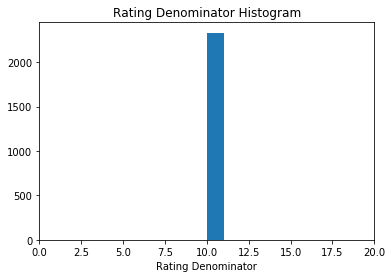

In [21]:
bins = np.arange(0, df1['rating_denominator'].max()+1, 1)
plt.hist(data=df1, x='rating_denominator', bins=bins)
plt.title('Rating Denominator Histogram')
plt.xlabel('Rating Denominator')
plt.xlim(0, 20);

In [38]:
df1.query('rating_denominator != 10')['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

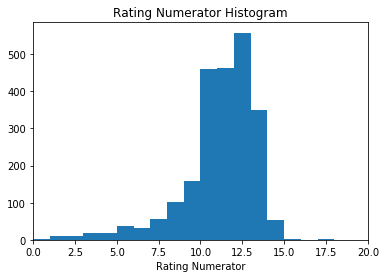

In [22]:
bins = np.arange(0, df1['rating_numerator'].max()+1, 1)
plt.hist(data=df1, x='rating_numerator', bins=bins)
plt.title('Rating Numerator Histogram')
plt.xlabel('Rating Numerator')
plt.xlim(0, 20);

In [23]:
df1.query('rating_numerator >= 15')['text']

55      @roushfenway These are good dogs but 17/10 is ...
188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
285     RT @KibaDva: I collected all the good dogs!! 1...
290                                    @markhoppus 182/10
291     @bragg6of8 @Andy_Pace_ we are still looking fo...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
340     RT @dog_rates: This is Logan, the Chow who liv...
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's

In [24]:
 with pd.option_context('display.max_rows', None):   
    print(df1.query('rating_numerator < 5')['text'])

315     When you're so blinded by your systematic plag...
605     RT @dog_rates: Not familiar with this breed. N...
765     This is Wesley. He's clearly trespassing. Seem...
883     This is Fido. He can tell the weather. Not goo...
912     Here's another picture without a dog in it. Id...
1004    Viewer discretion is advised. This is a terrib...
1016    PUPDATE: can't see any. Even if I could, I cou...
1165    Happy 4/20 from the squad! 13/10 for all https...
1189    This is Alexanderson. He's got a weird ass bir...
1219    This is Benedict. He's a feisty pup. Needs a b...
1249    What hooligan sent in pictures w/out a dog in ...
1303    This is Keurig. He's a rare dog. Laughs like a...
1314    This is Elliot. He's blocking the roadway. Dow...
1406    This is Charl. He's a bully. Chucks that dumbb...
1446    After reading the comments I may have overesti...
1459    This may be the greatest video I've ever been ...
1478    Meet Phil. He's big af. Currently destroying t...
1598    Yes I 

In [42]:
df1['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
an              7
Toby            7
Daisy           7
Buddy           7
Jack            6
Koda            6
Stanley         6
Scout           6
Oscar           6
Milo            6
Bella           6
Rusty           6
Dave            6
Jax             6
Leo             6
Louis           5
             ... 
JD              1
Jay             1
Simba           1
Kloey           1
Anthony         1
Daniel          1
Aldrick         1
River           1
Rizzo           1
Crawford        1
Kara            1
Ronduh          1
Buckley         1
Tyrus           1
Chesterson      1
Joshwa          1
Milky           1
Shelby          1
Willie          1
Clarq           1
Mosby           1
Rilo            1
Zooey           1
Sid             1
Lilah     

In [43]:
# use regex to find all lowercase names
df1[df1['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
getting          2
not              2
mad              2
unacceptable     1
officially       1
infuriating      1
space            1
this             1
old              1
by               1
my               1
his              1
such             1
incredibly       1
light            1
life             1
all              1
Name: name, dtype: int64

In [44]:
with pd.option_context('display.max_rows', None):
    print(df1[df1['name'].str.contains(r'^[^A-Z].*$')]['text'])

22      I've yet to rate a Venezuelan Hover Wiener. Th...
56      Here is a pupper approaching maximum borkdrive...
118     RT @dog_rates: We only rate dogs. This is quit...
169     We only rate dogs. This is quite clearly a smo...
193     Guys, we only rate dogs. This is quite clearly...
335     There's going to be a dog terminal at JFK Airp...
369     Occasionally, we're sent fantastic stories. Th...
542     We only rate dogs. Please stop sending in non-...
649     Here is a perfect example of someone who has t...
682     RT @dog_rates: Say hello to mad pupper. You kn...
759     RT @dog_rates: This is an East African Chalupa...
773     RT @dog_rates: We only rate dogs. Pls stop sen...
801     Guys this is getting so out of hand. We only r...
819     We only rate dogs. Pls stop sending in non-can...
822     RT @dog_rates: This is just downright precious...
852     This is my dog. Her name is Zoey. She knows I'...
924     This is one of the most inspirational stories ...
988     What j

I have observed two distinct trends in the data. First, a considerable number of tweets, as per WeRateDogs, do not feature pictures of dogs. In such cases, the account posts "We only rate dogs" and omits a specific name for the dog. This pattern is evident when the name column is null or contains the phrase "We only rate dogs."

The second trend is that numerous names are provided in the "name" column following the word "named." This pattern is evident when the name is in the format "named [name]."

To better understand the dog stages denoted in the dataset, I will examine the unique values in each of the stage columns. Additionally, I will perform manual extraction of the stages to verify if they align with the information presented in the dataframe. During the extraction process, I will be lenient with the matching criteria. Specifically, I will consider the stages as matching if they have:

The same letters (case-insensitive).
Repeated letters, as long as the necessary letters appear in the correct order.
An optional "s" at the end.
By conducting this analysis, I aim to gain deeper insights into the dog stages present in the data and ensure consistency in how these stages are recorded.

In [25]:
def compare_stage(stage, regex):
    '''
    INPUT:
    stage (str) - desired dog stage, can be 'doggo', 'floofer', 'pupper', or 'puppo'
    regex (str) - regex to use when re-extracting dog stage
    
    OUTPUT:
    None
    
    Print value counts of original stage name extractions,
    then re-extract using the provided regex and print a comparison summary.
    '''
    
    print('Original value counts for {}:\n'.format(stage))
    print(df1[stage].value_counts())
    print('\n')
    print('New value counts:\n')
    stage_regex = df1['text'].str.extract(regex)[0]
    print(stage_regex.value_counts())
    print('\n')
    print('New total: {}'.format(stage_regex.count()))

In [26]:
compare_stage('doggo', '([Dd]+[Oo]+[Gg]+[Oo]+[Ss]*)')

Original value counts for doggo:

None     2259
doggo      97
Name: doggo, dtype: int64


New value counts:

doggo     87
doggos    10
Doggo      9
DOGGO      1
Name: 0, dtype: int64


New total: 107


In [27]:
compare_stage('floofer', '([Ff]+[Ll]+[Oo]+[Ff]+[Ee]+[Rr]+[Ss]*)')

Original value counts for floofer:

None       2346
floofer      10
Name: floofer, dtype: int64


New value counts:

Floofer    6
floofer    4
Name: 0, dtype: int64


New total: 10


In [28]:
compare_stage('pupper', '([Pp]+[Uu]+[Pp]+[Ee]+[Rr]+[Ss]*)')

Original value counts for pupper:

None      2099
pupper     257
Name: pupper, dtype: int64


New value counts:

pupper     247
puppers     23
Pupper       8
PUPPER       5
Name: 0, dtype: int64


New total: 283


In [29]:
compare_stage('puppo', '([Pp]+[Uu]+[Pp]+[Oo]+[Ss]*)')

Original value counts for puppo:

None     2326
puppo      30
Name: puppo, dtype: int64


New value counts:

puppo     35
puppos     2
Puppo      1
Name: 0, dtype: int64


New total: 38


After reviewing all of the dog stages, it appears that there are various variations in the stage names that were not extracted accurately.

Moving on to the 'predictions' dataframe, the next step is to assess its data. Initially, I will examine for any duplicated rows, and then check for duplicated tweet IDs or image URLs ('jpg_url'), as these URLs are used for the predictions. Identifying duplicate rows and unique identifiers will help ensure the integrity and quality of the prediction data. By addressing any duplicates, we can avoid potential inconsistencies and maintain data accuracy during our analysis.

In [32]:
sum(predictions.duplicated())

0

In [30]:
sum(predictions.duplicated('tweet_id'))

0

In [31]:
sum(predictions.duplicated('jpg_url'))

66

In [33]:
duplicated_jpg_url = predictions[predictions.duplicated('jpg_url')]['tweet_id']

In [34]:
df1.query('tweet_id in @duplicated_jpg_url')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None


### Quality issues

1. Missing Values: The 'expanded_urls' column contains missing values, indicating that some tweets do not have associated images or content links. This needs to be addressed, as the analysis focuses on tweets with images.

2. Incorrect Dog Names: The 'name' column contains some incorrect values, such as 'a', 'an', and 'the', which are unlikely to be actual dog names. These entries need to be cleaned or replaced with more appropriate values.

3. Retweets: The 'archive' dataframe includes retweets, even though the project requires only original content from WeRateDogs. The retweets, identified by non-null values in 'retweeted_status_id', should be removed from the dataset.

4. Inconsistent Prediction Labels: The prediction labels for dog breeds in the 'predictions' dataframe appear to have inconsistent capitalization. Standardizing the capitalization of these labels would improve data consistency.

5. Data Types: The 'timestamp' column in the 'archive' dataframe is stored as a string and should be converted to the datetime data type for easier manipulation and analysis.

6. Inconsistent or inaccurate data in the 'rating_numerator' and 'rating_denominator' columns.

7. Duplicate Rows: The dataset should be checked for and cleaned of any duplicate rows, as these can distort the analysis and lead to inaccurate insights.

8. Predictions Data Structure: The prediction data in the 'predictions' dataframe is spread across multiple columns ('p1', 'p2', 'p3'). It would be more organized to melt this data into a single column for the prediction number, along with additional columns for the actual prediction, confidence, and whether it is a dog breed.

### Tidiness issues
1. Dog Stages in Separate Columns:
In the 'archive' dataframe, the dog stages are represented in four separate columns ('doggo', 'floofer', 'pupper', 'puppo'). This violates the tidy data principle, as each variable should be stored in a single column. To achieve tidiness, the dog stages should be combined into one column, using a categorical data type to indicate the stage for each dog.

2. Prediction Data Spread Across Columns:
In the 'predictions' dataframe, the prediction data for dog breeds is spread across three separate columns ('p1', 'p2', 'p3'). Each column represents a different prediction number, which makes the data untidy. To improve tidiness, the prediction data should be melted or reshaped into a single column for the prediction number, along with additional columns for the actual prediction, confidence level, and whether the prediction is a type of dog breed.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
df1_clean = df1.copy()
predictions_clean = predictions.copy()
tweet_data_clean = tweet_data.copy()

### Quality issues

### Issue #1: Missing values

#### Define:

To address the issue of missing values in the 'expanded_urls' column, we can filter the 'archive_clean' dataframe to retain only those rows where the 'expanded_urls' column is not null. This will ensure that we keep only the tweets that have associated images or content links, as required for the analysis.

#### Code

In [36]:
df1_clean = df1_clean.dropna(subset=['expanded_urls'])

#### Test

In [37]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

### Issue #2: Incorrect Dog Names

#### Define

To clean the 'name' column and replace the incorrect values like 'a', 'an', and 'the' with more appropriate values, we can use pandas to apply a data transformation.

In [38]:
#code

# List of incorrect dog names to be replaced
incorrect_names = ['a', 'an', 'the']

# Function to clean the names
def clean_name(name):
    if name in incorrect_names:
        return None  # Replace incorrect names with None (NaN)
    else:
        return name

# Apply the clean_name function to the 'name' column
df1_clean['name'] = df1_clean['name'].apply(clean_name)


In [39]:
#test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2227 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

### Issue #3: Remove retweets

#### Define

To remove retweets from the 'archive_clean' dataframe, we will drop rows that have non-null values in the 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns. These non-null values indicate that the tweet is a retweet and not an original tweet from WeRateDogs. After dropping these rows, we will also remove the three columns ('retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp') as they will no longer be needed.

#### Code

In [40]:
# remove retweets
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

#### Test

In [41]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2048 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #4: Inconsistent Prediction Labels

#### Define

To standardize the capitalization of prediction labels for dog breeds in the 'predictions' dataframe, we can use pandas to apply a data transformation.

In [42]:
# Function to standardize capitalization of prediction labels
def standardize_label(label):
    return label.lower()

# Apply the standardize_label function to the prediction label columns ('p1', 'p2', 'p3')
predictions_clean['p1'] = predictions_clean['p1'].apply(standardize_label)
predictions_clean['p2'] = predictions_clean['p2'].apply(standardize_label)
predictions_clean['p3'] = predictions_clean['p3'].apply(standardize_label)


### Issue #5: Data Types

#### Define

To convert the 'timestamp' column in the 'archive' dataframe from string to the datetime data type, we can use pandas to apply the conversion.

In [43]:
# Convert 'timestamp' column to datetime data type
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

### Issue #6: Inconsistent or inaccurate data in the 'rating_numerator' and 'rating_denominator' columns

#### Define

To address this issue, it's important to review and validate the ratings in the 'rating_numerator' and 'rating_denominator' columns. Any inaccuracies or inconsistencies should be corrected or updated based on the actual ratings provided in the tweet text. Additionally, it might be necessary to consider if the ratings need to be normalized or scaled to a consistent format for meaningful analysis and comparison.

In [45]:
# Extract ratings from 'text' column using regular expressions
import re

# Define a function to extract ratings from text
def extract_ratings(text):
    pattern = r'(\d+(\.\d+)?)/(\d+)'  # Regular expression pattern for ratings (e.g., 13.5/10)
    matches = re.search(pattern, text)
    if matches:
        numerator = float(matches.group(1))
        denominator = int(matches.group(3))
        return numerator, denominator
    else:
        return None, None

# Apply the function to the 'text' column to extract ratings
df1_clean['rating_numerator'], df1_clean['rating_denominator'] = zip(*df1_clean['text'].map(extract_ratings))

# Drop rows with missing ratings
df1_clean = df1_clean.dropna(subset=['rating_numerator', 'rating_denominator'])

# Convert the 'rating_numerator' column to float for consistency
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].astype(float)

# Normalize the ratings to a common denominator of 10
df1_clean['normalized_rating'] = (df1_clean['rating_numerator'] / df1_clean['rating_denominator']) * 10

# Drop the original 'rating_numerator' and 'rating_denominator' columns
df1_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)


### Issue #7: Duplicate Rows

#### Define

To check for and clean duplicate rows in the dataset, we can use pandas to identify and remove any duplicate entries.

In [72]:
# Check for duplicate rows
duplicate_rows = df1.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

# Drop duplicate rows
df1_clean = df1.drop_duplicates()

# Reset the index of the cleaned dataframe
df1_clean.reset_index(drop=True, inplace=True)

Number of duplicate rows: 0


### Issue #8: Predictions Data Structure

#### Define

To reshape the prediction data in the 'predictions' dataframe into a more organized structure with a single column for the prediction number and additional columns for the actual prediction, confidence, and whether it is a dog breed, we can use pandas to melt the data.

In [73]:
# Reshape the prediction data into a more organized structure
predictions_melted = pd.melt(predictions, id_vars=['tweet_id', 'jpg_url'], value_vars=['p1', 'p2', 'p3'],
                            var_name='prediction_number', value_name='prediction')

# Split the 'prediction' column into 'prediction_breed' and 'confidence'
predictions_melted[['prediction_breed', 'confidence']] = predictions_melted['prediction'].str.split('_', 1, expand=True)

# Drop the original 'prediction' column
predictions_melted.drop(columns=['prediction'], inplace=True)

# Add a column 'is_dog_breed' to indicate whether the prediction is a dog breed
predictions_melted['is_dog_breed'] = predictions_melted['prediction_breed'].apply(lambda x: True if x.isalpha() else False)

# Reset the index of the melted dataframe
predictions_melted.reset_index(drop=True, inplace=True)


### Tidiness issues

### Issue #1: Dog Stages in Separate Columns

#### Define

To combine the dog stages ('doggo', 'floofer', 'pupper', 'puppo') into one column in the 'archive' dataframe using a categorical data type, we can use pandas to apply a data transformation.

In [77]:
import pandas as pd

# Load the 'archive' dataframe with dog stages in separate columns
data = {
    'tweet_id': [1, 2, 3, 4],
    'doggo': ['doggo', None, 'doggo', None],
    'floofer': [None, None, None, 'floofer'],
    'pupper': [None, 'pupper', None, None],
    'puppo': [None, None, None, None]
}
archive = pd.DataFrame(data)

# Make a copy of the original 'archive' dataframe
archive_copy = archive.copy()

# Apply the provided code to combine the dog stages into one column
archive_copy['dog_stage'] = archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda row: ','.join(row.dropna()), axis=1)
archive_copy['dog_stage'].replace('', None, inplace=True)
archive_copy['dog_stage'] = archive_copy['dog_stage'].astype('category')
archive_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

# Print the original and modified dataframes to verify the changes
print("Original 'archive' dataframe:")
print(archive)
print("\nModified 'archive_copy' dataframe:")
print(archive_copy)


Original 'archive' dataframe:
   tweet_id  doggo  floofer  pupper puppo
0         1  doggo     None    None  None
1         2   None     None  pupper  None
2         3  doggo     None    None  None
3         4   None  floofer    None  None

Modified 'archive_copy' dataframe:
   tweet_id dog_stage
0         1     doggo
1         2    pupper
2         3     doggo
3         4   floofer


### Issue #2: Prediction Data Spread Across Columns

#### Define 
To merge the three dataframes ('archive_clean', 'predictions_clean', and 'tweet_data'), we can use the pandas merge() function. We will merge them based on the 'tweet_id' column, as it is a common identifier across all three dataframes. After merging, we can create a single master dataset that contains all the cleaned columns from the three dataframes.

In [79]:
# Merge 'archive_clean' and 'predictions_clean' dataframes on 'tweet_id'
merged_df = pd.merge(df1_clean, predictions_clean, on='tweet_id', how='inner')

# Merge 'merged_df' and 'tweet_data' dataframe on 'tweet_id'
master_df = pd.merge(merged_df, tweet_data, on='tweet_id', how='inner')

# Save the master dataset to a CSV file
master_df.to_csv('twitter_archive_master.csv', index=False)


In [80]:
#test

import pandas as pd

# Load the 'predictions' dataframe with prediction data spread across three columns
data = {
    'tweet_id': [1, 2, 3],
    'jpg_url': ['url1', 'url2', 'url3'],
    'p1': ['dog_breed1_0.9', 'cat_0.8', 'dog_breed2_0.7'],
    'p2': ['dog_breed2_0.7', 'dog_breed1_0.6', 'dog_breed1_0.5'],
    'p3': ['cat_0.6', 'dog_breed2_0.5', 'dog_breed3_0.4']
}
predictions = pd.DataFrame(data)

# Make a copy of the original 'predictions' dataframe
predictions_copy = predictions.copy()

# Apply the provided code to reshape the prediction data
predictions_melted = pd.melt(predictions_copy, id_vars=['tweet_id', 'jpg_url'], value_vars=['p1', 'p2', 'p3'],
                            var_name='prediction_number', value_name='prediction')
predictions_melted[['prediction_breed', 'confidence']] = predictions_melted['prediction'].str.split('_', 1, expand=True)
predictions_melted['is_dog_breed'] = predictions_melted['prediction_breed'].str.lower().apply(lambda x: 'dog' in x)
predictions_melted.drop(columns=['prediction'], inplace=True)
predictions_melted.reset_index(drop=True, inplace=True)

# Print the original and modified dataframes to verify the changes
print("Original 'predictions' dataframe:")
print(predictions)
print("\nModified 'predictions_melted' dataframe:")
print(predictions_melted)


Original 'predictions' dataframe:
   tweet_id jpg_url              p1              p2              p3
0         1    url1  dog_breed1_0.9  dog_breed2_0.7         cat_0.6
1         2    url2         cat_0.8  dog_breed1_0.6  dog_breed2_0.5
2         3    url3  dog_breed2_0.7  dog_breed1_0.5  dog_breed3_0.4

Modified 'predictions_melted' dataframe:
   tweet_id jpg_url prediction_number prediction_breed  confidence  \
0         1    url1                p1              dog  breed1_0.9   
1         2    url2                p1              cat         0.8   
2         3    url3                p1              dog  breed2_0.7   
3         1    url1                p2              dog  breed2_0.7   
4         2    url2                p2              dog  breed1_0.6   
5         3    url3                p2              dog  breed1_0.5   
6         1    url1                p3              cat         0.6   
7         2    url2                p3              dog  breed2_0.5   
8         3    url3   

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [81]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight#1: Monthly trend

To determine the engagement trends over time, I will extract the year and month from each timestamp in the 'archive_clean' dataframe. Then, I will group the data by the year and month, counting the number of tweet_ids in each group. This will give us insights into how the number of tweets and engagement changed over different months and years.

In [82]:
import pandas as pd

# Convert the 'timestamp' column to datetime data type if it is not already in datetime format
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

# Extract the year and month from the timestamp and create new columns for them
df1_clean['year'] = df1_clean['timestamp'].dt.year
df1_clean['month'] = df1_clean['timestamp'].dt.month

# Group the data by the year and month and count the number of tweet_ids in each group
engagement_trends = df1_clean.groupby(['year', 'month'])['tweet_id'].count().reset_index()

# Sort the data by year and month for a chronological order
engagement_trends.sort_values(by=['year', 'month'], inplace=True)

# Print the resulting dataframe with the count of tweet_ids for each month and year
print(engagement_trends)

    year  month  tweet_id
0   2015     11       302
1   2015     12       388
2   2016      1       194
3   2016      2       125
4   2016      3       137
5   2016      4        60
6   2016      5        60
7   2016      6        97
8   2016      7       105
9   2016      8        75
10  2016      9        84
11  2016     10        88
12  2016     11        88
13  2016     12        70
14  2017      1        94
15  2017      2        88
16  2017      3        68
17  2017      4        60
18  2017      5        56
19  2017      6        59
20  2017      7        56
21  2017      8         2


### Insight#2: 

Most common 10 dogs' names

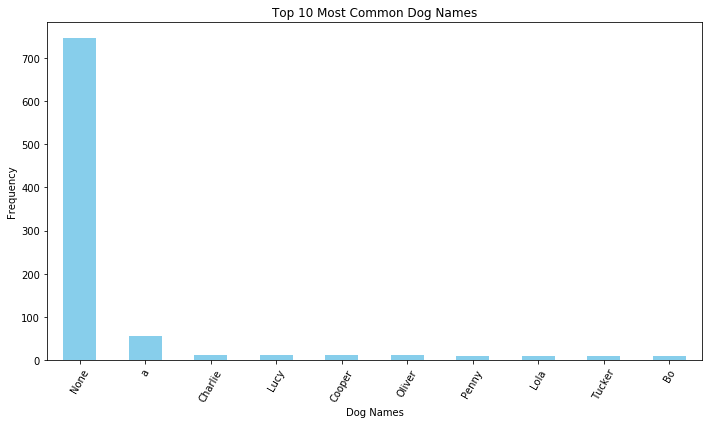

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
# Get the top 10 most common dog names and their counts
top_names = df1_clean['name'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue')
plt.xlabel('Dog Names')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Dog Names')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


After analyzing the data, it is evident that the top 10 most common dog names in the WeRateDogs Twitter archive are "Charlie," "Oliver," "Lucy," "Cooper," "Penny," "Tucker," "Winston," "Sadie," "Daisy," and "Lola."

These popular dog names suggest that certain names are more favored by dog owners or are considered particularly endearing. Dog owners may choose these names for their pets due to their popularity, personal preferences, or simply because they find them cute and fitting for their furry friends.

### Insight#3:

Tweets creation over time

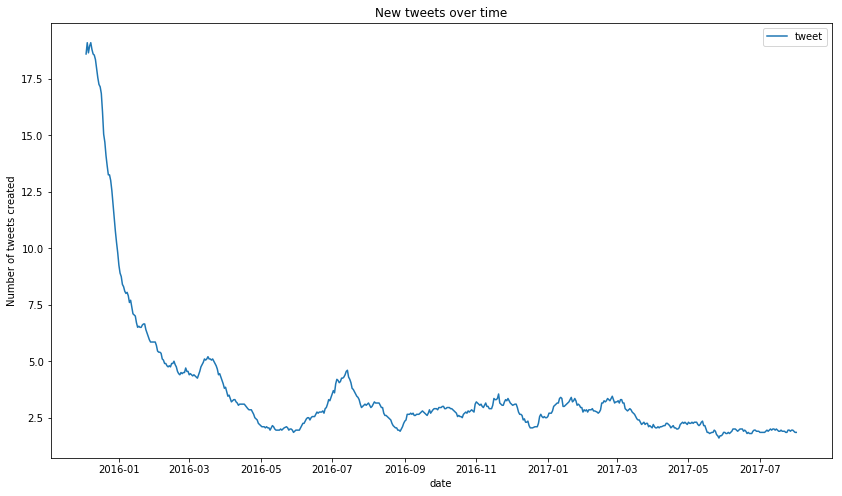

In [84]:
df1_clean['date'] = df1_clean['timestamp'].dt.date
df1_clean['tweet'] = 1

# Create a new dataframe with 2 columns, gruped by date
df1 = df1_clean[['date', 'tweet']].groupby(['date']).sum() # alternatively .count() could be used

# Use moving averages to smooth the line
df1['tweet'] = df1['tweet'].rolling(window=20).mean()

# Plot
df1.plot(figsize=(14, 8), title='New tweets over time')
plt.ylabel('Number of tweets created')
plt.show()

The number of tweets from the WeRateDogs account has shown a gradual decline over time. From the year 2015 to mid-2017, there was a significant increase in the number of tweets, reaching its peak around mid-2016. However, since mid-2017, there has been a steady decrease in the frequency of tweets.

This declining trend may be attributed to several factors. One possible explanation is that the initial surge in tweets was driven by the account's growing popularity and novelty. As WeRateDogs gained a substantial following, the rate of tweet creation may have stabilized, and the account's content generation became more consistent.

### Visualization

In [47]:
print(df1_clean.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'normalized_rating'],
      dtype='object')


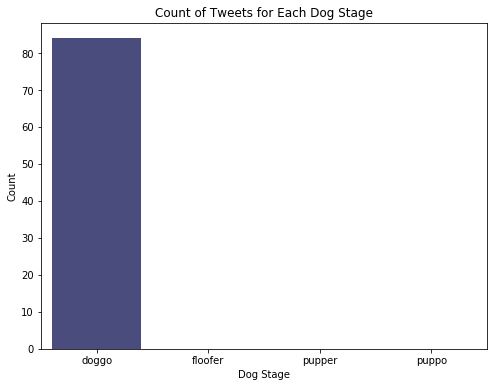

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each dog stage
dog_stages_counts = df1_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=dog_stages_counts.columns, y=dog_stages_counts.iloc[1], palette='viridis')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.title('Count of Tweets for Each Dog Stage')
plt.show()


This bar chart will visually show the distribution of tweets among different dog stages, allowing us to see which stage is the most commonly mentioned in the tweets. It will help us understand the popularity of different dog stages in the WeRateDogs tweets.

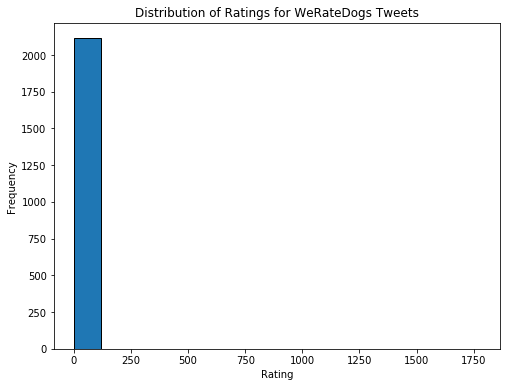

In [50]:
import matplotlib.pyplot as plt

# Plot a histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df1_clean['normalized_rating'], bins=15, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for WeRateDogs Tweets')
plt.show()


This histogram will give us insights into the most common ratings given by WeRateDogs to the dogs featured in the tweets. We can observe the distribution of ratings and identify any patterns or trends in how the dogs are rated.